<a href="https://colab.research.google.com/github/JPapECE/ArtificialIntelligence2024_NTUA/blob/main/MM2024_25_LabProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Μηχανική Μάθηση
####1η ατομική εργασία
ΣΗΜΜΥ- ΕΜΠ -Ακ. Έτος 2024-25



# ⚠️
`Επισημαίνεται ότι απαγορεύεται η ανάρτηση των λύσεων των εργαστηριακών ασκήσεων στο github, ή σε άλλες ιστοσελίδες. Η σχεδίαση και το περιεχόμενο των εργαστηριακών projects αποτελούν αντικείμενο πνευματικής ιδιοκτησίας της διδακτικής ομάδας του μαθήματος.`

 `⚠️  Το σύνολο δεδομένων που σας δόθηκε δεν πρέπει να εμπλουτισθεί με οποιοδήποτε τρόπο. Η εργασία στην οποία θα χρησιμοποιηθεί εμπλουτισμένο σύνολο δεδομένων, δεν θα διορθωθεί.`

Ονοματεπώνυμο φοιτητή: Δημήτριος Παπαδεράκης

Α.Μ.: 03121205

### 1. Εισαγωγή συνόλου δεδομένων

Tο σύνολο δεδομένων για το training-validation μπορείτε να το κατεβάσετε από [εδώ](https://drive.google.com/file/d/1ro8ff5KZwErgkxIvb3D5ykp2l5nV75Yj/view?usp=sharing).


1.α. Φορτώστε το σύνολο δεδομένων "train-val.csv"  στο notebook σας.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
from google.colab import drive

# Mount Google Drive
drive.mount("/content/drive", force_remount=True)


# Assuming the file is in your Google Drive, replace the path accordingly
file_path = '/content/drive/MyDrive/train-val.csv'

Mounted at /content/drive


In [ ]:
data = pd.read_csv(file_path)

### 2. Διερευνητική ανάλυση δεδομένων -Exploratory Data Analysis (EDA)
Χρησιμοποιήστε code cells  με τις κατάλληλες τεχνικές EDA για την κατανόηση του συνόλου δεδομένων και text cells για επεξήγηση των αποτελεσμάτων.

Χρησιμοποιώντας τις κατάλληλες μεθόδους παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. το πλήθος των δειγμάτων και των χαρακτηριστικών του συνόλου δεδομένων,

2β. το είδος των χαρακτηριστικών του συνόλου δεδομένων,  

2γ. τις ετικέτες των χαρακτηριστικών,

2δ. το πλήθος των κατηγοριών,

2ε. πόσα δείγματα ανήκουν σε κάθε κατηγορία,

2στ. τη συσχέτιση μεταξύ των δεδομένων,

2ζ. οποιαδήποτε άλλη πληροφορία πιστεύετε ότι είναι χρήσιμη για την κατανόηση του συνόλου δεδομένων.

**2α**

Παρατηρούμε πως έχουμε 7263 γραμμές , η πρώτη γραμμή περιέχει τους τίτλους συνεπώς έχουμε 7262 δείγματα όπως φαίνεται.
Επίσης έχουμε 24 στήλες άρα συνολικά κάθε δείγμα έχει 24 χαρακτηριστικά.



In [ ]:
# 2α. Number of samples and features
#Labels = data[['RainToday','RainTomorrow']]
#Features = data.drop(Labels, axis=1)
num_samples, num_features = data.shape
print(f"Number of samples: {num_samples}")
print(f"Number of features: {num_features}")

Number of samples: 7262
Number of features: 24


**2β**

In [ ]:
# 2β. Data types of features
print("\nData types of features:")
print(data.dtypes)




Data types of features:
ID                 int64
Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RainTomorrow       int64
dtype: object


**2γ** + **2δ**

Έχουμε μία ετικέτα η οποία μας δείχνει αν είναι πιο πιθανό να βρέξει αύριο ή όχι . Η ετικέτα παίρνει τις τιμές 1 και 0 αντίστοιχα.

Αυτό σημαίνει πως χωρίζουμε τα δείγματά μας σε δύο κατήγορίες , τις μέρες έχουν μεγαλύτερη πιθανότητα να βρέχει την επομένη τους και τις μέρες που έχουν μεγαλύτερη πιθανότητα να μην βρέχει την επόμενή τους.

In [ ]:
Label = data['RainTomorrow']
print(f" The only label is RainTomorrow")
print(f" The possible values of the label are : {Label.unique()}")
print(f" So the number of categories is: {Label.nunique()}")

 The only label is RainTomorrow
 The possible values of the label are : [0 1]
 So the number of categories is: 2


**2ε**

Όπως βλέπουμε έχουμε 5.623 μέρες στις οποίες δεν προβλέπεται βροχή την επόμενη μέρα και 1.639 μέρες που προβλέπεται.

In [ ]:
print(f"The number of samples in each category: {Label.value_counts()}")


The number of samples in each category: RainTomorrow
0    5623
1    1639
Name: count, dtype: int64


**2στ**


In [ ]:
numeric_data = data.select_dtypes(include=['float64'])  # Selecting only numeric data for correlation
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

                MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.709894  0.093915     0.460272  0.064273   
MaxTemp        0.709894  1.000000 -0.098454     0.571740  0.469705   
Rainfall       0.093915 -0.098454  1.000000    -0.074776 -0.182762   
Evaporation    0.460272  0.571740 -0.074776     1.000000  0.348179   
Sunshine       0.064273  0.469705 -0.182762     0.348179  1.000000   
WindGustSpeed  0.165904  0.008927  0.182268     0.168108 -0.068132   
WindSpeed9am   0.199696  0.009758  0.127017     0.207150  0.020779   
WindSpeed3pm   0.192065  0.057063  0.093557     0.135517  0.047236   
Humidity9am   -0.227187 -0.485498  0.204239    -0.502250 -0.463217   
Humidity3pm    0.023297 -0.493780  0.235734    -0.373950 -0.621705   
Pressure9am   -0.366575 -0.217367 -0.192867    -0.208560  0.093877   
Pressure3pm   -0.378641 -0.326057 -0.133201    -0.244390  0.025512   
Cloud9am       0.056189 -0.315717  0.188081    -0.193750 -0.690637   
Cloud3pm      -0.000

**2ζ**

Βλέπουμε την συσχέτιση σε γράφημα

The correlation heatmap is:


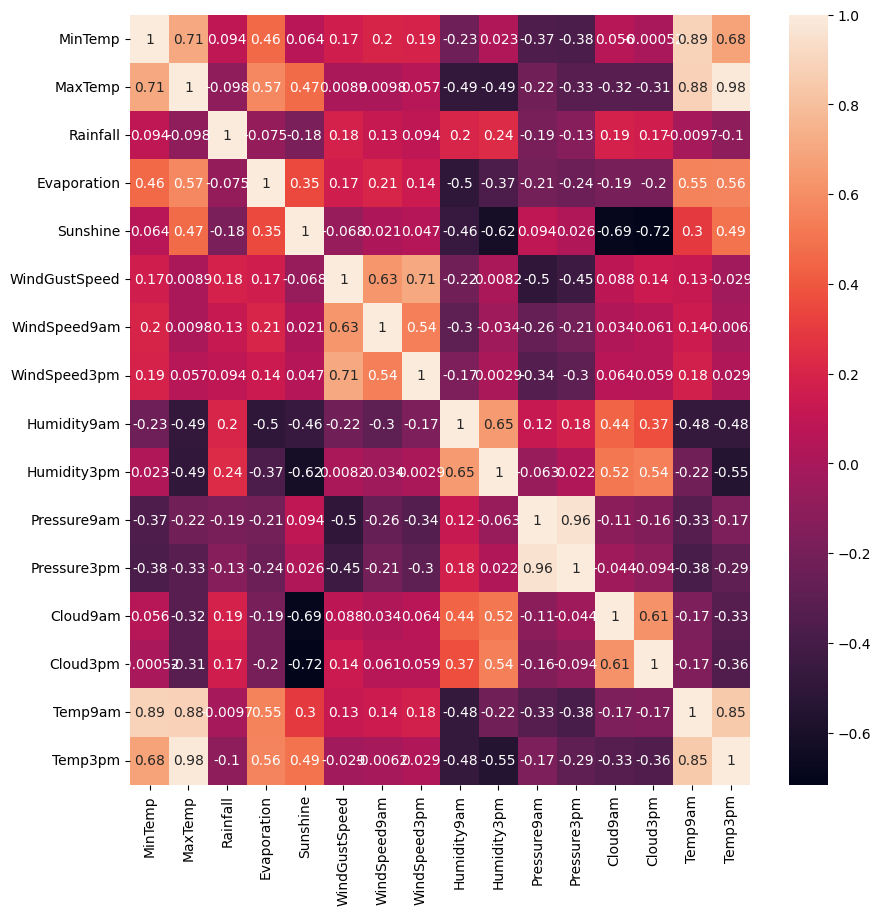

In [ ]:
plt.figure(figsize=(10, 10))  # Set the size of the heatmap
print("The correlation heatmap is:")  # Display correlation matrix as a heatmap to understand relationships between numeric features
%matplotlib inline
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True)  # Annot=True shows the correlation values on the heatmap
plt.show()  # Display the heatmap

Βλέπουμε παρακάτω τα ιστογράμματα των χαρακτηριστικών και της ετικέτας

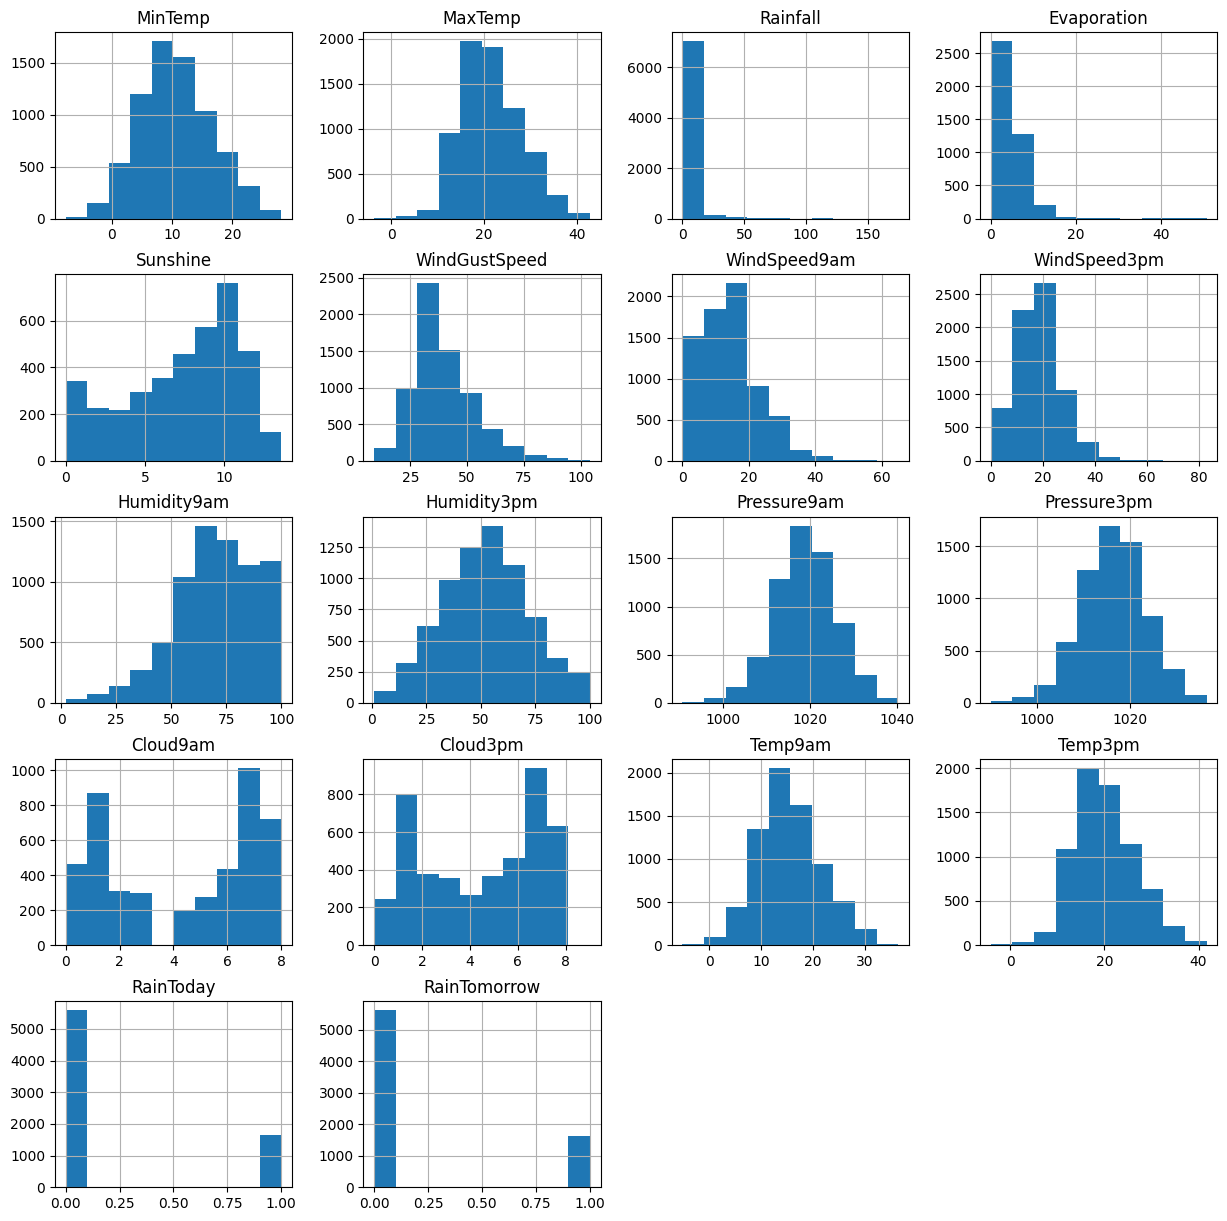

In [ ]:
selected_columns = data.iloc[:]
selected_columns = selected_columns.drop(['ID'], axis=1)
selected_columns.hist(bins=10, figsize=(15, 15))
plt.show()

 ⚠️ Κατά την προεπεξεργασία του συνόλου δεδομένων (τόσο του train-val όσο και του test) **MHN ΑΦΑΙΡΕΣΕΤΕ ΤΗΝ ΣΤΗΛΗ ID**  διότι χρειάζεται για τον διαγωνισμό kaggle.

### 3. Προεπεξεργασία συνόλου δεδομένων
💡`Χρησιμοποιήστε το Column Transformer για τη δημιουργία και την εφαρμογή χωριστών μετασχηματιστών για αριθμητικά και κατηγορικά δεδομένα.`




3.α.  Θα χρησιμοποιήσετε όλα τα χαρακτηριστικά του συνόλου δεδομένων για την εκπαίδευση των ταξινομητών ή θα επιλέξετε κάποια από αυτά;  Θα κάνετε κάποια συνένωση κάποιων χαρακτηριστικών για δημιουργία νέων χαρακτηριστικών για το μοντέλο σας;


Μπορούμε να συνενώσουμε τα χαρακτηριστικά :
 * WindSpeed9am , WindSpeed3pm
 * Humidity9am , Humidity3pm
 * Pressure9am , Pressure3pm
 * Temp9am , Temp3pm
 * Cloud9am , Cloud3pm

Και θα κρατήσουμε **μόνο** τους μέσους όρους τους  
Επίσης το WindGustDir δεν μας ενδιαφέρει , ενώ μετατρέπουμε την ημερομηνία τρεις αρηθμιτικές τιμές για να είναι πιο εύκολη η διαχείρισή της αργότερα.

In [ ]:
# Calculating averages for some features and adding them as new columns

data['WindSpeed'] = data[['WindSpeed9am', 'WindSpeed3pm']].mean(axis=1)
data['Humidity'] = data[['Humidity9am', 'Humidity3pm']].mean(axis=1)
data['Pressure'] = data[['Pressure9am', 'Pressure3pm']].mean(axis=1)
data['Cloud'] = data[['Cloud9am', 'Cloud3pm']].mean(axis=1)
data['Temp'] = data[['Temp9am', 'Temp3pm']].mean(axis=1)

data['Day'] = pd.to_datetime(data['Date']).dt.day
data['Month'] = pd.to_datetime(data['Date']).dt.month
data['Year'] = pd.to_datetime(data['Date']).dt.year


In [ ]:
#droping the unessecary columns
pre_data = data.drop(['Date', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'WindGustDir'], axis=1)


3.β. Υπάρχουν απουσιάζουσες τιμές; Γράψτε κατάλληλο κώδικα ώστε να χειριστείτε αυτές τις τιμές.

Αρχικά πρέπει να βρούμε πόσες τιμές λείπουν.

Μετά θα βρούμε ποιές κατηγορίες είναι αριθμητικές και ποιές όχι

Στις αριθμητικές τιμές θα αντικαταστήσουμε τις κενές τιμές με την μέση τιμή του πεδίου.

Ενώ στις μη-αριθμητικές τιμές αντικαθιστώ με την πιο συχνή τιμή του πεδίου.

In [ ]:
from sklearn.impute import SimpleImputer

#finding the missing values
print("The missing values per category are:")
missing_values = pre_data.isnull().sum()
print(missing_values,pre_data.shape)

#seperate the columns
numbers = pre_data.select_dtypes(include=['float64']).columns
non_numbers = pre_data.select_dtypes(include=['object']).columns

# Recreate the pre_data
pre_data[numbers]=SimpleImputer(strategy='mean').fit_transform(pre_data[numbers])
pre_data[non_numbers]=SimpleImputer(strategy='most_frequent').fit_transform(pre_data[non_numbers])

The missing values per category are:
ID                  0
Location            0
MinTemp            25
MaxTemp            11
Rainfall            0
Evaporation      3039
Sunshine         3445
WindGustSpeed     473
WindDir9am        570
WindDir3pm        213
Temp3pm           120
RainToday           0
RainTomorrow        0
WindSpeed          45
Humidity           49
Pressure          681
Cloud            2448
Temp               12
Day                 0
Month               0
Year                0
dtype: int64 (7262, 21)


3.γ. Γράψτε κώδικα για την κατάλληλη μετατροπή των κατηγορικών μεταβλητών ώστε να μπορούν να τους διαχειριστούν οι ταξινομητές που θα χρησιμοποιήσετε.

Παρατηρούμε πως έχουμε τα εξής κατηγορικά χαρακτηριστικά :

 * Location
 * WindDir9am
 * WindDir3pm

Με χρήση του Label encoder τα μετατρέπουμε σε αριθμούς , πιο πάνω είχαμε σπάσει την ημερομηνία σε τρια αρηθμιτικά χαρακτηριστικά

In [ ]:
from sklearn.preprocessing import LabelEncoder

print(f"The starting data types are: \n{pre_data.dtypes}")

encoder=LabelEncoder()
pre_data['Location']=encoder.fit_transform(pre_data['Location'])
pre_data['WindDir9am']=encoder.fit_transform(pre_data['WindDir9am'])
pre_data['WindDir3pm']=encoder.fit_transform(pre_data['WindDir3pm'])

print(f"The final data types are: \n{pre_data.dtypes}")


The starting data types are: 
ID                 int64
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
Temp3pm          float64
RainToday          int64
RainTomorrow       int64
WindSpeed        float64
Humidity         float64
Pressure         float64
Cloud            float64
Temp             float64
Day                int32
Month              int32
Year               int32
dtype: object
The final data types are: 
ID                 int64
Location           int64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustSpeed    float64
WindDir9am         int64
WindDir3pm         int64
Temp3pm          float64
RainToday          int64
RainTomorrow       int64
WindSpeed        float64
Humidity         float64
Pressure         float64
Clou

3.δ. Γράψτε κώδικα για την κλιμάκωση των χαρακτηριστικών, αν την θεωρείτε απαραίτητη.

Στο μέρος 4 βέβαια είναι απαραίτητη η κλιμάκωση


Σε πρώτη φάση δεν θεωρείται απαραίτητη η κλιμάκωση των δεδομένω ωστόσο παρατείθεται ο κώδικας

In [ ]:
from sklearn.preprocessing import StandardScaler

# Separate features and target variable


# Apply feature scaling using StandardScaler
#scaler = StandardScaler()
#pre_data = scaler.fit_transform(pre_data)


#pre_data[numbers.columns] = scaler.fit_transform(pre_data[numbers.columns])


3.ε. Εκτελέστε όλα τα προηγούμενα βήμα προεκπαίδευσης (χρήση μετασχηματιστών) ώστε να είναι "καθαρό" το αρχικό σύνολο για να χρησιμοποιηθεί για την εκπαίδευση των ταξινομητών.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

numbers_index = [data.columns.get_loc(col) for col in data.select_dtypes(include=['float64']).columns]
non_numbers_index = [data.columns.get_loc(col) for col in data.select_dtypes(include=['object']).columns]


#use a pipeline for a cleaner workflow
#non_numbers_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),('onehot', OneHotEncoder(handle_unknown='ignore'))])
numbers_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),('scaler', StandardScaler())])

#preprocessor = ColumnTransformer(transformers=[('num', numbers_transformer, numbers_index),('cat', non_numbers_transformer, non_numbers_index)])
preprocessor = ColumnTransformer(transformers=[('num', numbers_transformer, numbers_index)])

preprocessed_data = preprocessor.fit_transform(data)

3.στ. Αφού έχετε "καθαρίσει" το αρχικό σύνολο εκπαίδευσης, γράψτε τον κατάλληλο κώδικα ώστε από το αρχικό σύνολο εκπαίδευσης να δημιουργήσετε τα σύνολα Χ και y.

💡 `Η στήλη 'RainTomorrow' είναι η τιμή που θέλουμε να προβλέψει ο ταξινομητής μας.`



In [ ]:
Y = pre_data['RainTomorrow']
X = pre_data.drop('RainTomorrow', axis=1)

#pre_data.drop(['RainTomorrow'], axis=1, inplace=True)

3.ζ. Διαχωρίστε το σύνολο δεδομένων σε σύνολο εκπαίδευσης (train set) και σε σύνολο επικύρωσης (validation set) (ο διαχωρισμός να είναι train set 70% και validation set 30%).


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.3, random_state=17)

### 4. Εκπαίδευση μοντέλου με default τιμές στις παραμέτρους των ταξινομητών

Θα εκπαιδεύσουμε τους ακόλουθους ταξινομητές με το σύνολο εκπαίδευσης των δεδομένων μας:
1. Naive Bayes
2. KNeighborsClassifier
3. LogisticRegression
4. MLP με ένα κρυφό επίπεδο
5. SVC
6. Decision Tree
7. Random Forest


In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

 4.α. Εκπαιδεύστε (fit)  και τους  7 ταξινομητές που προαναφέρθηκαν (εμφανίστε τα δείγματα από το train set μαζί με την ετικέτα τους στην είσοδο του κάθε ταξινομητή), χρησιμοποιώντας τις default τιμές για όλες τις παραμέτρους τους.

In [ ]:
# Initialize classifiers
Naive_Bayes= make_pipeline(StandardScaler(), GaussianNB())

K_Nearest_Neighbors = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))

Logistic_Regression = make_pipeline(StandardScaler(), LogisticRegression())

MLP = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000))# Example with one hidden layer

SVC = make_pipeline(StandardScaler(), SVC())

Decision_Tree = make_pipeline(StandardScaler(), DecisionTreeClassifier())

Random_Forest = make_pipeline(StandardScaler(), RandomForestClassifier())


# Train classifiers
print("Training Gaussian Naive Bayes Classifier:")
Naive_Bayes.fit(X_train, y_train)
print("Training K-Nearest Neighbors Classifier:")
K_Nearest_Neighbors.fit(X_train, y_train)
print("Training Logistic Regression Classifier:")
Logistic_Regression.fit(X_train, y_train)
print("Training Multilayer Perceptron Classifier:")
MLP.fit(X_train, y_train)
print("Training Support Vector Classifier:")
SVC.fit(X_train, y_train)
print("Training Decision Tree Classifier:")
Decision_Tree.fit(X_train, y_train)
print("Training Random Forest Classifier:")
Random_Forest.fit(X_train, y_train)

#print the training samples and their labels if needed
print(f"Training samples and their labels for Gaussian Naive Bayes: \nX_train: {X_train[:5]} \ny_train: {y_train[:5]}")

Training Gaussian Naive Bayes Classifier:
Training K-Nearest Neighbors Classifier:
Training Logistic Regression Classifier:
Training Multilayer Perceptron Classifier:
Training Support Vector Classifier:
Training Decision Tree Classifier:
Training Random Forest Classifier:
Training samples and their labels for Gaussian Naive Bayes: 
X_train:         ID  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
5985  1381        27     16.1     18.0       0.0     6.000000   0.00000   
310   2629        42      1.5     15.1       0.0     4.699005   7.35693   
6215  4426        19     11.0     20.3       0.0     4.000000   0.60000   
6401  4821        20     16.6     31.3       0.0     5.700000  11.50000   
133   2702        45      5.4     21.3       0.0     2.000000   4.80000   

      WindGustSpeed  WindDir9am  WindDir3pm  Temp3pm  RainToday  WindSpeed  \
5985           54.0           0           0     17.8          0       29.0   
310            22.0           2           5     14

4.β. Εφαρμόστε στα εκπαιδευμένα μοντέλα από το validation set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).


In [ ]:
# Predict using the trained models on the validation set
y_prdct_gnb = Naive_Bayes.predict(X_val)
y_prdct_knn = K_Nearest_Neighbors.predict(X_val)
y_prdct_lr = Logistic_Regression.predict(X_val)
y_prdct_mlp = MLP.predict(X_val)
y_prdct_svc = SVC.predict(X_val)
y_prdct_dt = Decision_Tree.predict(X_val)
y_prdct_rf = Random_Forest.predict(X_val)



4.γ. Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του validation set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας το F1 score.


In [ ]:

# Calculate and print F1 scores for each model

print("Classification Reports for Gaussian Naive Bayes:\n", classification_report(y_val, y_prdct_gnb))
f1_gnb = f1_score(y_val, y_prdct_gnb , average='weighted', labels=np.unique(y_prdct_gnb))
print("F1 Score for Gaussian Naive Bayes:", f1_gnb)

print("Classification Reports for K-Nearest Neighbors:\n", classification_report(y_val, y_prdct_knn))
f1_knn = f1_score(y_val, y_prdct_knn, average='weighted', labels=np.unique(y_prdct_knn))
print("F1 Score for K-Nearest Neighbors:", f1_knn)

print("Classification Reports for Logistic Regression:\n", classification_report(y_val, y_prdct_lr))
f1_lr = f1_score(y_val, y_prdct_lr, average='weighted', labels=np.unique(y_prdct_lr))
print("F1 Score for Logistic Regression:", f1_lr)

print("Classification Reports for Multilayer Perceptron:\n", classification_report(y_val, y_prdct_mlp))
f1_mlp = f1_score(y_val, y_prdct_mlp, average='weighted', labels=np.unique(y_prdct_mlp))
print("F1 Score for Multilayer Perceptron:", f1_mlp)

print("Classification Reports for Support Vector Classifier:\n", classification_report(y_val, y_prdct_svc))
f1_svc = f1_score(y_val, y_prdct_svc, average='weighted', labels=np.unique(y_prdct_svc))
print("F1 Score for Support Vector Classifier:", f1_svc)

print("Classification Reports for Decision Tree:\n", classification_report(y_val, y_prdct_dt))
f1_dt = f1_score(y_val, y_prdct_dt, average='weighted', labels=np.unique(y_prdct_dt))
print("F1 Score for Decision Tree:", f1_dt)

print("Classification Reports for Random Forest:\n", classification_report(y_val, y_prdct_rf))
f1_rf = f1_score(y_val, y_prdct_rf, average='weighted', labels=np.unique(y_prdct_rf))
print("F1 Score for Random Forest:",f1_rf)

Classification Reports for Gaussian Naive Bayes:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      1680
           1       0.53      0.55      0.54       499

    accuracy                           0.79      2179
   macro avg       0.70      0.70      0.70      2179
weighted avg       0.79      0.79      0.79      2179

F1 Score for Gaussian Naive Bayes: 0.7877967186728565
Classification Reports for K-Nearest Neighbors:
               precision    recall  f1-score   support

           0       0.83      0.94      0.88      1680
           1       0.63      0.37      0.47       499

    accuracy                           0.81      2179
   macro avg       0.73      0.65      0.67      2179
weighted avg       0.79      0.81      0.79      2179

F1 Score for K-Nearest Neighbors: 0.7868595776468698
Classification Reports for Logistic Regression:
               precision    recall  f1-score   support

           0       0.86      0.94   

4.δ.  Αξιολογήστε συνολικά την επίδοση των μοντέλων χρησιμοποιώντας κάποιο γράφημα (π.χ. ιστόγραμμα, bar plot) και σχολιάστε ποιο μοντέλο είχε την καλύτερη επίδοση.


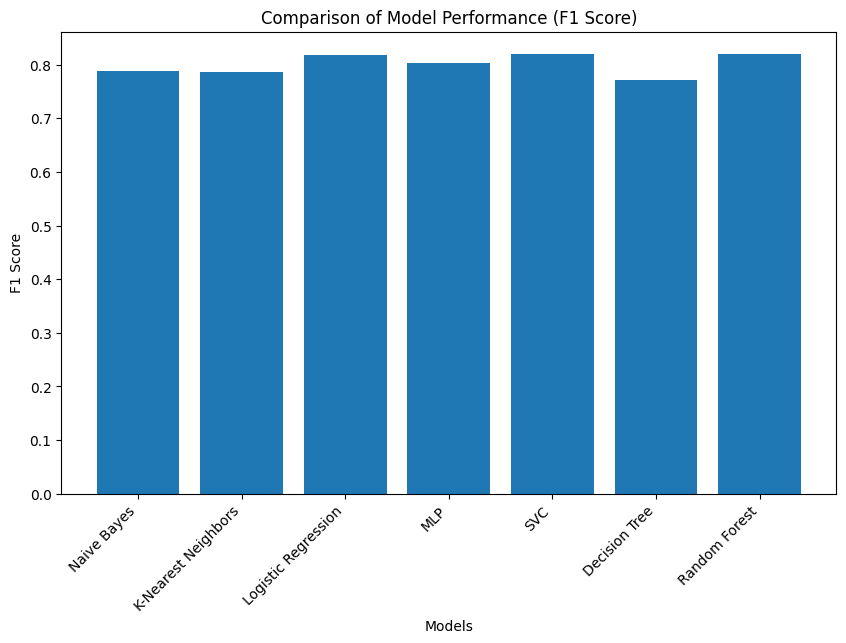

The model with the best F1 score is: Random Forest with an F1 score of: 0.820156267013336


In [ ]:
# prompt: Αξιολογήστε συνολικά την επίδοση των μοντέλων χρησιμοποιώντας κάποιο γράφημα (π.χ. ιστόγραμμα, bar plot) και σχολιάστε ποιο μοντέλο είχε την καλύτερη επίδοση.

# Create a dictionary to store the F1 scores for each model
f1_scores = {
    'Naive Bayes': f1_gnb,
    'K-Nearest Neighbors': f1_knn,
    'Logistic Regression': f1_lr,
    'MLP': f1_mlp,
    'SVC': f1_svc,
    'Decision Tree': f1_dt,
    'Random Forest': f1_rf
}

# Create a bar plot to visualize the F1 scores
plt.figure(figsize=(10, 6))
plt.bar(f1_scores.keys(), f1_scores.values())
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('Comparison of Model Performance (F1 Score)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


# Find the model with the best F1 score
best_model = max(f1_scores, key=f1_scores.get)
print(f"The model with the best F1 score is: {best_model} with an F1 score of: {f1_scores[best_model]}")

### 5. Προετοιμασία αρχείου για την πρώτη υποβολή στο kaggle

In [ ]:
import os
from google.colab import drive

# Mount Google Drive
drive.mount("/content/drive", force_remount=True)


# Assuming the file is in your Google Drive, replace the path accordingly
file_path = '/content/drive/MyDrive/test.csv'

Mounted at /content/drive


5.α. Χρησιμοποιήστε **ΜΟΝΟ** το μοντέλο σας με την καλύτερη επίδοση για να κάνετε προβλέψεις, χρησιμοποιώντας το [test set](https://drive.google.com/file/d/14HsEya9h1wxk2wJLh6c0Ibz2V4_WA13p/view?usp=sharing).


In [ ]:
test_data = pd.read_csv(file_path)

In [ ]:
# Calculating averages for some features and adding them as new columns

test_data['WindSpeed'] = test_data[['WindSpeed9am', 'WindSpeed3pm']].mean(axis=1)
test_data['Humidity'] = test_data[['Humidity9am', 'Humidity3pm']].mean(axis=1)
test_data['Pressure'] = test_data[['Pressure9am', 'Pressure3pm']].mean(axis=1)
test_data['Cloud'] = test_data[['Cloud9am', 'Cloud3pm']].mean(axis=1)
test_data['Temp'] = test_data[['Temp9am', 'Temp3pm']].mean(axis=1)

test_data['Day'] = pd.to_datetime(test_data['Date']).dt.day
test_data['Month'] = pd.to_datetime(test_data['Date']).dt.month
test_data['Year'] = pd.to_datetime(test_data['Date']).dt.year

In [ ]:
#droping the unessecary columns
test_data = test_data.drop(['Date', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'WindGustDir'], axis=1)


In [ ]:
#seperate the columns
numbers = test_data.select_dtypes(include=['float64']).columns
non_numbers = test_data.select_dtypes(include=['object']).columns

# Recreate the test_data
test_data[numbers]=SimpleImputer(strategy='mean').fit_transform(test_data[numbers])
test_data[non_numbers]=SimpleImputer(strategy='most_frequent').fit_transform(test_data[non_numbers])

In [ ]:
encoder=LabelEncoder()
test_data['Location']=encoder.fit_transform(test_data['Location'])
test_data['WindDir9am']=encoder.fit_transform(test_data['WindDir9am'])
test_data['WindDir3pm']=encoder.fit_transform(test_data['WindDir3pm'])

In [ ]:
# For good measure, count again the gaps
print("The missing values per category are:")
missing_values = test_data.isnull().sum()
print(missing_values, test_data.shape)

# For good measure, count again the gaps
print("The missing values per category are:")
missing_values = pre_data.isnull().sum()
print(missing_values, pre_data.shape)

The missing values per category are:
ID               0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
Temp3pm          0
RainToday        0
WindSpeed        0
Humidity         0
Pressure         0
Cloud            0
Temp             0
Day              0
Month            0
Year             0
dtype: int64 (2421, 20)
The missing values per category are:
ID               0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
Temp3pm          0
RainToday        0
RainTomorrow     0
WindSpeed        0
Humidity         0
Pressure         0
Cloud            0
Temp             0
Day              0
Month            0
Year             0
dtype: int64 (7262, 21)


In [ ]:
X_submission = test_data.values
y_prediction = Random_Forest.predict(X_submission)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


5.β. Αποθηκεύστε τις προβλέψεις από το καλύτερο μοντέλο σας σε ένα csv αρχείο. To csv αρχείο θα πρέπει να είναι περιέχει 2 στήλες: η πρώτη στήλη να περιέχει την στήλη id του test set file και η δεύτερη στήλη τις αντίστοιχες προβλέψεις που έκανε το καλύτερα εκπαιδευμένο μοντέλο σας (βήμα 5α).

In [ ]:
from google.colab import files

# Create a DataFrame with the ID and predictions
submission_df = pd.DataFrame({'ID': test_data['ID'], 'RainTomorrow': y_prediction})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

files.download('submission.csv')

print("Predictions saved to submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Predictions saved to submission.csv


### 6. Βελτιστοποίηση μοντέλων με εύρεση καλύτερων υπερπαραμέτρων των ταξινομητών

6.α. Για τους 7 ταξινομητές βελτιστοποιήστε την επίδοσή τους χρησιμοποιώντας αναζήτηση πλέγματος με διασταυρούμενη επικύρωση (k-fold 5)  με σκοπό την εύρεση των βέλτιστων υπερπαραμέτρων.

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the parameter grids for each classifier
param_grid_nb = {}  # No hyperparameters to tune for GaussianNB
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}
param_grid_lr = {'C': [0.1, 1, 10]}
param_grid_mlp = {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'alpha': [0.0001, 0.001, 0.01]}
param_grid_svc = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
param_grid_dt = {'max_depth': [3, 5, 7, 9]}
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7, 9]}

# Create a dictionary of classifiers and their parameter grids
classifiers = {
    'Naive Bayes': (GaussianNB(), param_grid_nb),
    'K-Nearest Neighbors': (KNeighborsClassifier(), param_grid_knn),
    'Logistic Regression': (LogisticRegression(), param_grid_lr),
    'MLP': (MLPClassifier(max_iter=1000), param_grid_mlp),
    'SVC': (SVC(), param_grid_svc),
    'Decision Tree': (DecisionTreeClassifier(), param_grid_dt),
    'Random Forest': (RandomForestClassifier(), param_grid_rf)
}

# Perform Grid Search for each classifier
best_params = {}
for name, (classifier, param_grid) in classifiers.items():
    print(f"Performing Grid Search for {name}...")
    grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='f1_weighted')
    grid_search.fit(X_train, y_train)
    best_params[name] = grid_search.best_params_
    print(f"Best parameters for {name}: {grid_search.best_params_}")

print("\nBest parameters for all classifiers:")
for name, params in best_params.items():
    print(f"{name}: {params}")

Performing Grid Search for Naive Bayes...
Best parameters for Naive Bayes: {}
Performing Grid Search for K-Nearest Neighbors...
Best parameters for K-Nearest Neighbors: {'n_neighbors': 3}
Performing Grid Search for Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best parameters for Logistic Regression: {'C': 1}
Performing Grid Search for MLP...
Best parameters for MLP: {'alpha': 0.0001, 'hidden_layer_sizes': (50,)}
Performing Grid Search for SVC...
Best parameters for SVC: {'C': 0.1, 'kernel': 'linear'}
Performing Grid Search for Decision Tree...
Best parameters for Decision Tree: {'max_depth': 5}
Performing Grid Search for Random Forest...
Best parameters for Random Forest: {'max_depth': 9, 'n_estimators': 50}

Best parameters for all classifiers:
Naive Bayes: {}
K-Nearest Neighbors: {'n_neighbors': 3}
Logistic Regression: {'C': 1}
MLP: {'alpha': 0.0001, 'hidden_layer_sizes': (50,)}
SVC: {'C': 0.1, 'kernel': 'linear'}
Decision Tree: {'max_depth': 5}
Random Forest: {'max_depth': 9, 'n_estimators': 50}


6.β. Εφαρμόστε στα εκπαιδευμένα μοντέλα από το validation set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).


In [ ]:
# Initialize classifiers with best parameters from grid search
Naive_Bayes_tuned = make_pipeline(StandardScaler(), GaussianNB())  # No tuned parameters for GaussianNB

K_Nearest_Neighbors_tuned = make_pipeline(StandardScaler(), KNeighborsClassifier(**best_params['K-Nearest Neighbors']))

Logistic_Regression_tuned = make_pipeline(StandardScaler(), LogisticRegression(**best_params['Logistic Regression']))

MLP_tuned = make_pipeline(StandardScaler(), MLPClassifier(**best_params['MLP'], max_iter=1000))

SVC_tuned = make_pipeline(StandardScaler(), SVC(**best_params['SVC']))

Decision_Tree_tuned = make_pipeline(StandardScaler(), DecisionTreeClassifier(**best_params['Decision Tree']))

Random_Forest_tuned = make_pipeline(StandardScaler(), RandomForestClassifier(**best_params['Random Forest']))


# Train classifiers with tuned parameters
print("Training Tuned Gaussian Naive Bayes Classifier:")
Naive_Bayes_tuned.fit(X_train, y_train)
print("Training Tuned K-Nearest Neighbors Classifier:")
K_Nearest_Neighbors_tuned.fit(X_train, y_train)
print("Training Tuned Logistic Regression Classifier:")
Logistic_Regression_tuned.fit(X_train, y_train)
print("Training Tuned Multilayer Perceptron Classifier:")
MLP_tuned.fit(X_train, y_train)
print("Training Tuned Support Vector Classifier:")
SVC_tuned.fit(X_train, y_train)
print("Training Tuned Decision Tree Classifier:")
Decision_Tree_tuned.fit(X_train, y_train)
print("Training Tuned Random Forest Classifier:")
Random_Forest_tuned.fit(X_train, y_train)



# Predict using the tuned models on the validation set
y_prdct_gnb_tuned = Naive_Bayes_tuned.predict(X_val)
y_prdct_knn_tuned = K_Nearest_Neighbors_tuned.predict(X_val)
y_prdct_lr_tuned = Logistic_Regression_tuned.predict(X_val)
y_prdct_mlp_tuned = MLP_tuned.predict(X_val)
y_prdct_svc_tuned = SVC_tuned.predict(X_val)
y_prdct_dt_tuned = Decision_Tree_tuned.predict(X_val)
y_prdct_rf_tuned = Random_Forest_tuned.predict(X_val)


Training Tuned Gaussian Naive Bayes Classifier:
Training Tuned K-Nearest Neighbors Classifier:
Training Tuned Logistic Regression Classifier:
Training Tuned Multilayer Perceptron Classifier:
Training Tuned Support Vector Classifier:
Training Tuned Decision Tree Classifier:
Training Tuned Random Forest Classifier:



6.γ. Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του validation set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας το F1 score.


Classification Reports for Tuned Gaussian Naive Bayes:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      1680
           1       0.53      0.55      0.54       499

    accuracy                           0.79      2179
   macro avg       0.70      0.70      0.70      2179
weighted avg       0.79      0.79      0.79      2179

F1 Score for Tuned Gaussian Naive Bayes: 0.7877967186728565
Classification Reports for Tuned K-Nearest Neighbors:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1680
           1       0.58      0.41      0.49       499

    accuracy                           0.80      2179
   macro avg       0.71      0.66      0.68      2179
weighted avg       0.78      0.80      0.79      2179

F1 Score for Tuned K-Nearest Neighbors: 0.7855751135451532
Classification Reports for Tuned Logistic Regression:
               precision    recall  f1-score   support

      

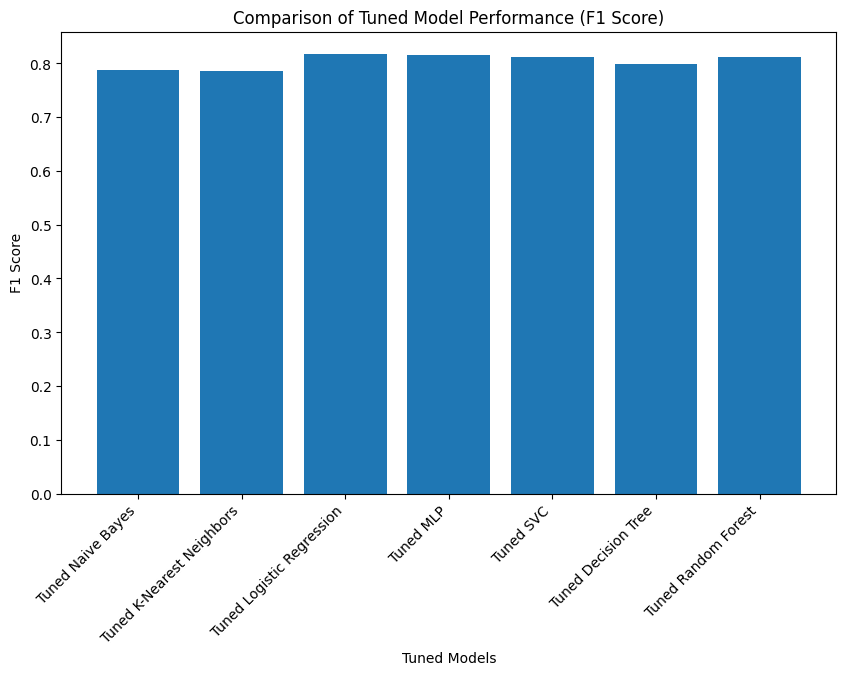

The tuned model with the best F1 score is: Tuned Logistic Regression with an F1 score of: 0.8182409978879823


In [ ]:
# prompt: 6.γ. Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του validation set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας το F1 score.

# Calculate and print F1 scores for each tuned model

print("Classification Reports for Tuned Gaussian Naive Bayes:\n", classification_report(y_val, y_prdct_gnb_tuned))
f1_gnb_tuned = f1_score(y_val, y_prdct_gnb_tuned , average='weighted', labels=np.unique(y_prdct_gnb_tuned))
print("F1 Score for Tuned Gaussian Naive Bayes:", f1_gnb_tuned)

print("Classification Reports for Tuned K-Nearest Neighbors:\n", classification_report(y_val, y_prdct_knn_tuned))
f1_knn_tuned = f1_score(y_val, y_prdct_knn_tuned, average='weighted', labels=np.unique(y_prdct_knn_tuned))
print("F1 Score for Tuned K-Nearest Neighbors:", f1_knn_tuned)

print("Classification Reports for Tuned Logistic Regression:\n", classification_report(y_val, y_prdct_lr_tuned))
f1_lr_tuned = f1_score(y_val, y_prdct_lr_tuned, average='weighted', labels=np.unique(y_prdct_lr_tuned))
print("F1 Score for Tuned Logistic Regression:", f1_lr_tuned)

print("Classification Reports for Tuned Multilayer Perceptron:\n", classification_report(y_val, y_prdct_mlp_tuned))
f1_mlp_tuned = f1_score(y_val, y_prdct_mlp_tuned, average='weighted', labels=np.unique(y_prdct_mlp_tuned))
print("F1 Score for Tuned Multilayer Perceptron:", f1_mlp_tuned)

print("Classification Reports for Tuned Support Vector Classifier:\n", classification_report(y_val, y_prdct_svc_tuned))
f1_svc_tuned = f1_score(y_val, y_prdct_svc_tuned, average='weighted', labels=np.unique(y_prdct_svc_tuned))
print("F1 Score for Tuned Support Vector Classifier:", f1_svc_tuned)

print("Classification Reports for Tuned Decision Tree:\n", classification_report(y_val, y_prdct_dt_tuned))
f1_dt_tuned = f1_score(y_val, y_prdct_dt_tuned, average='weighted', labels=np.unique(y_prdct_dt_tuned))
print("F1 Score for Tuned Decision Tree:", f1_dt_tuned)

print("Classification Reports for Tuned Random Forest:\n", classification_report(y_val, y_prdct_rf_tuned))
f1_rf_tuned = f1_score(y_val, y_prdct_rf_tuned, average='weighted', labels=np.unique(y_prdct_rf_tuned))
print("F1 Score for Tuned Random Forest:",f1_rf_tuned)


# Create a dictionary to store the F1 scores for each tuned model
f1_scores_tuned = {
    'Tuned Naive Bayes': f1_gnb_tuned,
    'Tuned K-Nearest Neighbors': f1_knn_tuned,
    'Tuned Logistic Regression': f1_lr_tuned,
    'Tuned MLP': f1_mlp_tuned,
    'Tuned SVC': f1_svc_tuned,
    'Tuned Decision Tree': f1_dt_tuned,
    'Tuned Random Forest': f1_rf_tuned
}

# Create a bar plot to visualize the F1 scores of tuned models
plt.figure(figsize=(10, 6))
plt.bar(f1_scores_tuned.keys(), f1_scores_tuned.values())
plt.xlabel('Tuned Models')
plt.ylabel('F1 Score')
plt.title('Comparison of Tuned Model Performance (F1 Score)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


# Find the tuned model with the best F1 score
best_tuned_model = max(f1_scores_tuned, key=f1_scores_tuned.get)
print(f"The tuned model with the best F1 score is: {best_tuned_model} with an F1 score of: {f1_scores_tuned[best_tuned_model]}")

6.δ.  Αξιολογήστε συνολικά την επίδοση των μοντέλων χρησιμοποιώντας κάποιο γράφημα (π.χ. ιστόγραμμα, bar plot) και σχολιάστε ποιο μοντέλο είχε την καλύτερη επίδοση.


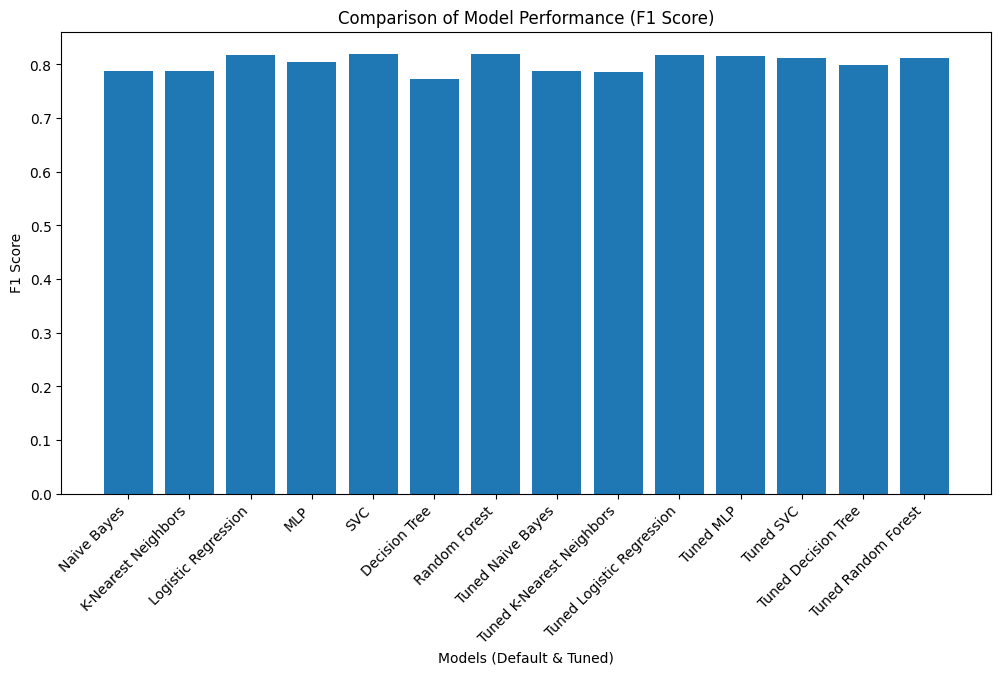

The model with the best overall F1 score is: Random Forest with an F1 score of: 0.820156267013336


In [ ]:
# prompt: 6.δ.  Αξιολογήστε συνολικά την επίδοση των μοντέλων χρησιμοποιώντας κάποιο γράφημα (π.χ. ιστόγραμμα, bar plot) και σχολιάστε ποιο μοντέλο είχε την καλύτερη επίδοση.

# Create a dictionary to store the F1 scores for both default and tuned models
all_f1_scores = {**f1_scores, **f1_scores_tuned}

# Create a bar plot to visualize the F1 scores of all models
plt.figure(figsize=(12, 6))
plt.bar(all_f1_scores.keys(), all_f1_scores.values())
plt.xlabel('Models (Default & Tuned)')
plt.ylabel('F1 Score')
plt.title('Comparison of Model Performance (F1 Score)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# Find the overall best model (either default or tuned)
best_overall_model = max(all_f1_scores, key=all_f1_scores.get)
print(f"The model with the best overall F1 score is: {best_overall_model} with an F1 score of: {all_f1_scores[best_overall_model]}")

### 7. Προετοιμασία αρχείου για τη δεύτερη υποβολή στο kaggle

7.α. Χρησιμοποιήστε **ΜΟΝΟ** το μοντέλο σας με την καλύτερη επίδοση για να κάνετε προβλέψεις χρησιμοποιώντας το δοθέν σύνολο εκπαίδευσης (test set).


In [ ]:

y_prediction = Random_Forest.predict(X_submission)
# Create a DataFrame with the ID and predictions
submission_df = pd.DataFrame({'ID': test_data['ID'], 'RainTomorrow': y_prediction})



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


7.β. Αποθηκεύστε τις προβλέψεις από το καλύτερο μοντέλο σας σε ένα csv αρχείο. To csv αρχείο θα πρέπει να είναι περιέχει 2 στήλες: η πρώτη στήλη να περιέχει την στήλη id του test set file και η δεύτερη στήλη τις αντίστοιχες προβλέψεις που έκανε το καλύτερα εκπαιδευμένο μοντέλο σας (βήμα 7α).

In [ ]:
# Save the DataFrame to a CSV file
submission_df.to_csv('submission_tuned.csv', index=False)

files.download('submission_tuned.csv')

print("Predictions saved to submission_tuned.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Predictions saved to submission_tuned.csv
